# Clustering using Cosine Distance

## Preparations

In [70]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import math
from functools import reduce
sns.set()
%matplotlib inline
import os

### Read the data

In [71]:
#GRANULARITY = 'one_hour'
#GRANULARITY = 'thirty_min'
GRANULARITY = 'five_min'
#GRANULARITY = 'one_min'

IMAGES_DIR = 'images/clustering/'

PATH = 'data/cleaned/samples50/' + GRANULARITY + '/'
DIR_CONTENT = os.listdir(PATH)

In [72]:
column_names = list(map(lambda s: s.split('.')[0], DIR_CONTENT))

In [73]:
df = pd.DataFrame(columns=column_names)

In [74]:
for filename in DIR_CONTENT:
    _id = filename.split('.')[0]
    tmp_df = pd.read_csv(PATH + filename)
    df[_id] = tmp_df['heart_rate']

In [75]:
df.head(5)

,yyyyy_12,ggggg_4,eeeee_12,eeeee_13,xxxxx_8,yyyyy_13,yyyyy_11,eeeee_11,eeeee_10,yyyyy_10,...,xxxxx_3,eeeee_18,xxxxx_2,xxxxx_6,ttttt_3,ttttt_2,xxxxx_7,xxxxx_5,ttttt_1,xxxxx_4
0,0.000000,0.0,0.0,0.618519,0.0,0.0,0.000000,29.296296,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.183333,0.0,0.0,0.000000,14.210000,1.943333,0.0,...,0.0,3.366667,0.0,14.816667,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.000000,0.0,0.0,0.863333,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,70.823333,0.0,0.0,0.0,0.0,0.0,0.0
3,14.123333,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,65.673333,0.0,0.0,0.0,0.0,0.0,0.0
4,17.566667,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,4.870000,0.0,...,0.0,0.000000,0.0,64.916667,0.0,0.0,0.0,0.0,0.0,0.0


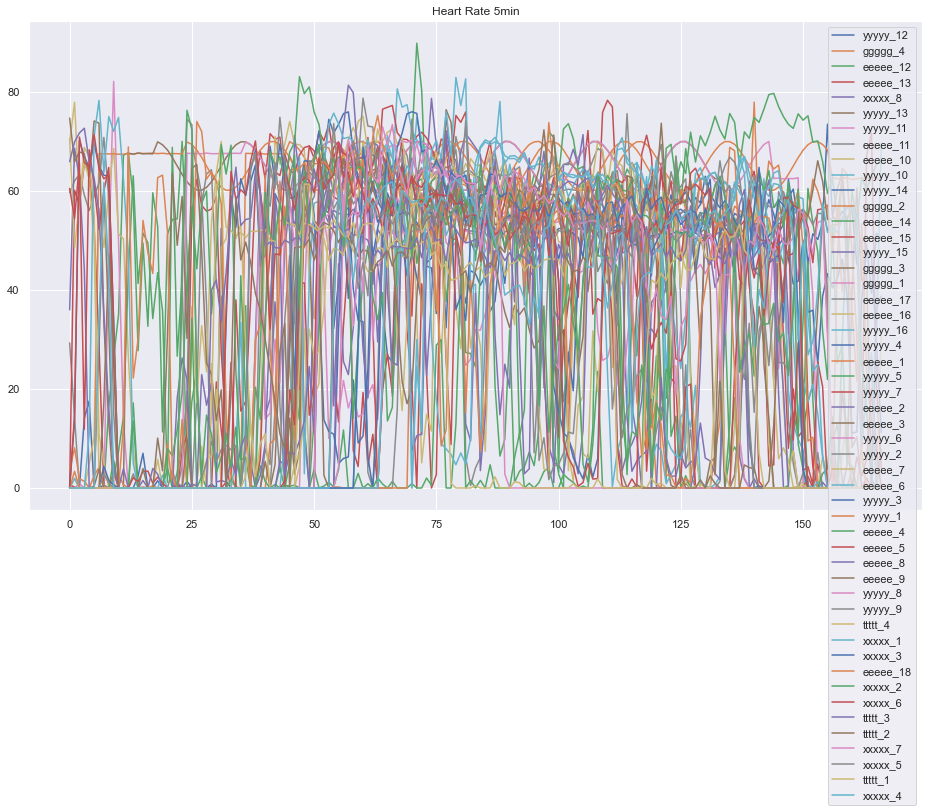

In [76]:
ax = df.plot(legend=True, title="Heart Rate 5min", figsize=(16,9))
fig = ax.get_figure()
#fig.savefig('/tmp/foo.png') # TODO

### Normalize the data

In [77]:
_mean = df.mean()
_std = df.std()

In [78]:
dfn = (df - _mean) / _std

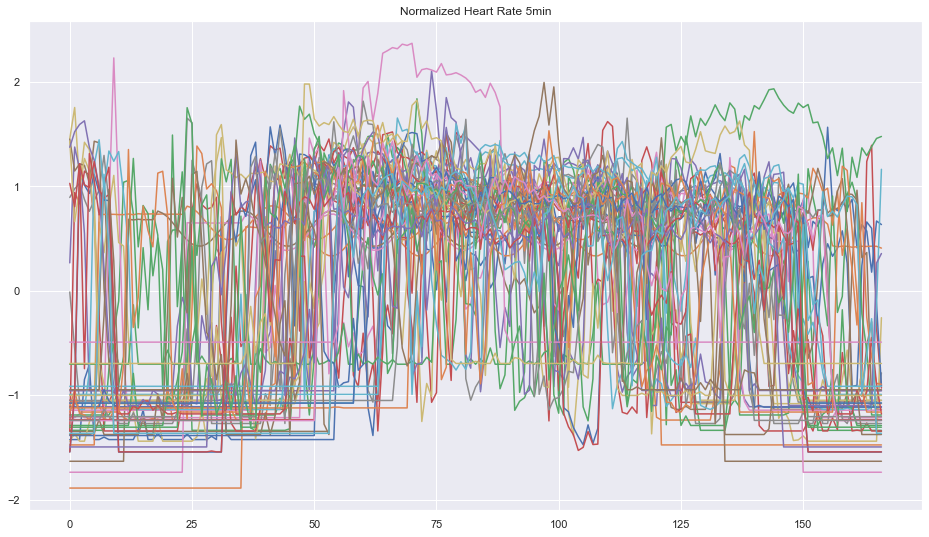

In [79]:
axn = dfn.plot(legend=False, title="Normalized Heart Rate 5min", figsize=(16,9))
fign = axn.get_figure()

## Calculate Cosine distance

In [80]:
from sklearn.metrics.pairwise import cosine_distances

In [81]:
dfnt = dfn.transpose()
cos_matrix = cosine_distances(dfnt)

In [82]:
cos_matrix[0]

array([0.        , 0.32381137, 0.7161268 , 0.86922565, 0.69215479,
       0.18517254, 0.43752133, 0.7236668 , 0.82262424, 0.28863213,
       0.18604994, 1.38769658, 0.66962321, 0.8732457 , 0.39356363,
       1.13261128, 0.72793932, 0.87584996, 0.73147833, 0.34846778,
       0.88080781, 0.71275722, 0.50407562, 0.31792371, 0.75604388,
       0.71363424, 0.6471961 , 0.26467766, 0.64226626, 0.76615227,
       0.72107874, 0.21128822, 0.91439219, 0.70186386, 0.77292854,
       0.54881804, 0.78443331, 0.82053448, 1.06388718, 0.37506438,
       0.2861701 , 0.90632106, 0.75972336, 0.86779815, 0.74428529,
       0.93860639, 0.30470437, 0.72020789, 0.7829489 , 0.18539762])

## Create Clusters

In [83]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from validclust.indices import dunn

from collections import defaultdict


In [84]:
cvi_lists = defaultdict(list)

for nbr_clusters in range(2, 21):
    tmp_model = KMeans(n_clusters=nbr_clusters, random_state=42)
    tmp_model.fit(cos_matrix)
    tmp_cluster_labels = tmp_model.labels_
    
    sil_score = silhouette_score(cos_matrix, tmp_cluster_labels)
    cvi_lists['sil'].append((nbr_clusters, sil_score))
    
    db_score = davies_bouldin_score(cos_matrix, tmp_cluster_labels)
    cvi_lists['db'].append((nbr_clusters, db_score))
    
    dunn_score = dunn(cos_matrix, tmp_cluster_labels)
    cvi_lists['dunn'].append((nbr_clusters, dunn_score))
    
    ch_score = calinski_harabasz_score(cos_matrix, tmp_cluster_labels)
    cvi_lists['ch'].append((nbr_clusters, ch_score))
    
    
    

In [85]:
cvi_lists

defaultdict(list,
            {'sil': [(2, 0.3629847276442488),
              (3, 0.35745271823944064),
              (4, 0.2724922537230215),
              (5, 0.30875480643307396),
              (6, 0.3173132223093083),
              (7, 0.2849305643209664),
              (8, 0.25594468574606694),
              (9, 0.2590851313238943),
              (10, 0.2356906160182898),
              (11, 0.24617012539141692),
              (12, 0.234665957090663),
              (13, 0.2489614578871654),
              (14, 0.1757361835551912),
              (15, 0.2111938958795073),
              (16, 0.21291173726863774),
              (17, 0.2341406122426561),
              (18, 0.225069193563798),
              (19, 0.20679715257913625),
              (20, 0.23047717622233876)],
             'db': [(2, 1.1264721939495383),
              (3, 0.7500887070170319),
              (4, 1.21419882584729),
              (5, 1.0474533015395973),
              (6, 0.9559775447420978),
              (7, 

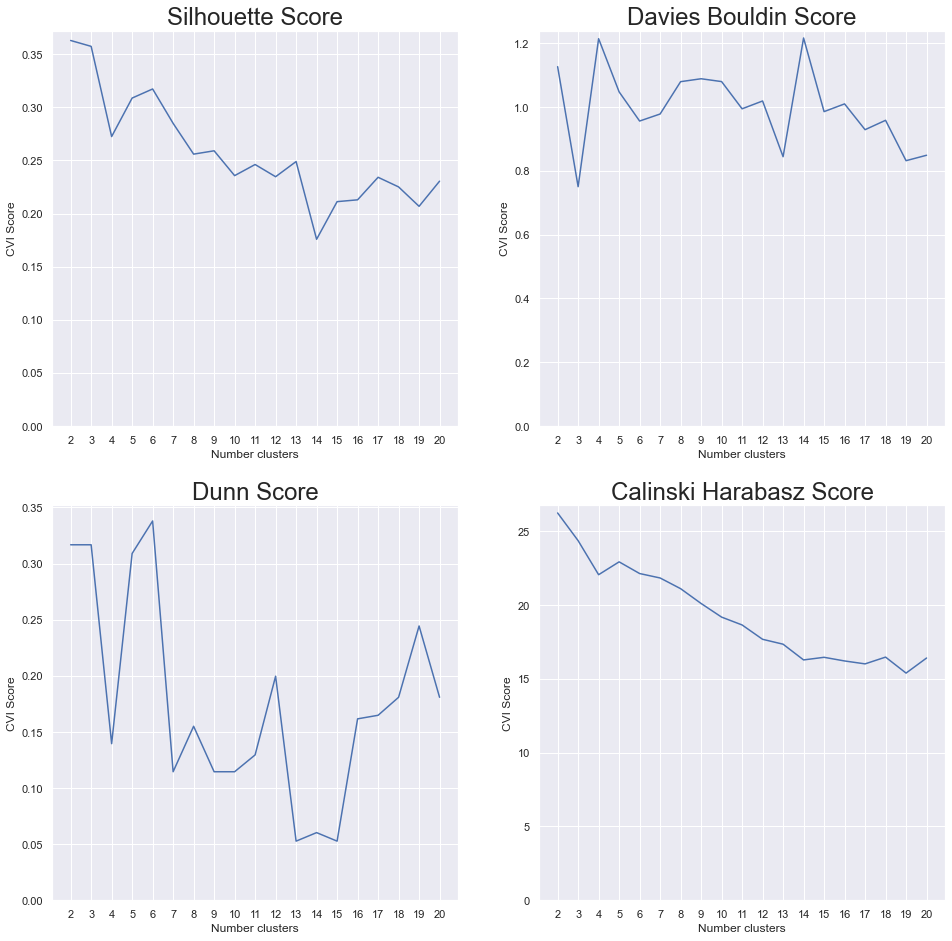

In [89]:
fig, axs = plt.subplots(2, 2, figsize=(16,16))

plt.setp(axs, xticks=list(range(2,21)))

x_sil, y_sil = list(zip(*cvi_lists['sil']))
axs[0][0].plot(x_sil, y_sil)
axs[0][0].set_ylim(0, )
axs[0][0].set_title('Silhouette Score', size=24)
axs[0][0].set_xlabel('Number clusters')
axs[0][0].set_ylabel('CVI Score')

x_db, y_db = list(zip(*cvi_lists['db']))
axs[0][1].plot(x_db, y_db)
axs[0][1].set_ylim(0, )
axs[0][1].set_title('Davies Bouldin Score', size=24)
axs[0][1].set_xlabel('Number clusters')
axs[0][1].set_ylabel('CVI Score')

x_dunn, y_dunn = list(zip(*cvi_lists['dunn']))
axs[1][0].plot(x_dunn, y_dunn)
axs[1][0].set_ylim(0, )
axs[1][0].set_title('Dunn Score', size=24)
axs[1][0].set_xlabel('Number clusters')
axs[1][0].set_ylabel('CVI Score')


x_ch, y_ch = list(zip(*cvi_lists['ch']))
axs[1][1].plot(x_ch, y_ch)
axs[1][1].set_ylim(0, )
axs[1][1].set_title('Calinski Harabasz Score', size=24)
axs[1][1].set_xlabel('Number clusters')
axs[1][1].set_ylabel('CVI Score')


#fig.savefig(IMAGES_DIR + 'cosine_cvis.png')


In [90]:
from optimizer import get_cvi_combination

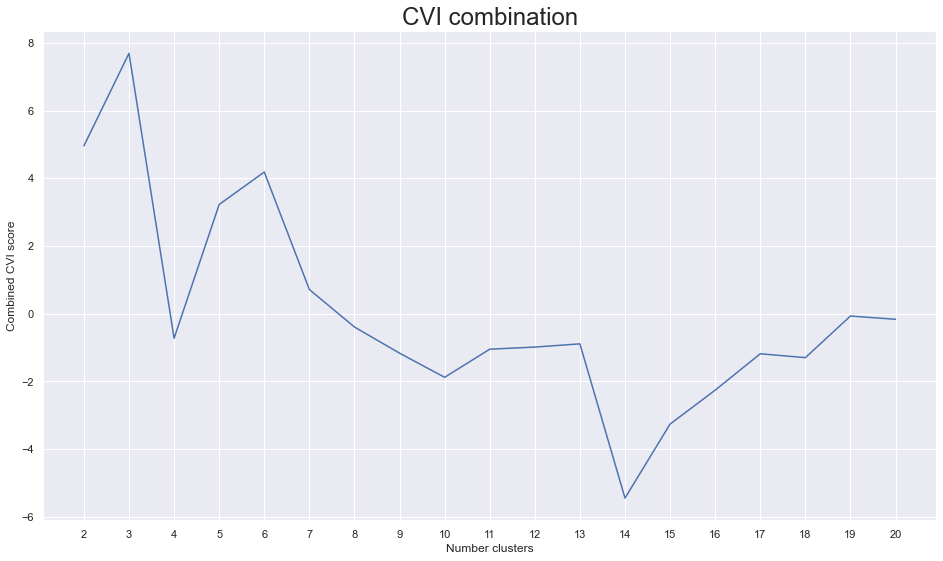

In [106]:
y = get_cvi_combination(y_sil, y_dunn, y_db, y_ch)

fig = plt.figure(figsize=(16,9))
plt.plot(x_ch, y)
ax = fig.gca()
plt.setp(ax, xticks=list(range(2,21)))
ax.set_title("CVI combination", size=24)
ax.set_xlabel('Number clusters')
ax.set_ylabel('Combined CVI score')
#fig.savefig(IMAGES_DIR + 'cvi_combination_cosine.png')

## Display Clusters

In [114]:
number_clusters = 12

In [115]:
model = KMeans(n_clusters=number_clusters, random_state=42)

In [116]:
model.fit(cos_matrix)

KMeans(n_clusters=12, random_state=42)

In [117]:
cluster_labels = model.labels_
cluster_labels

array([10,  1, 11,  5,  0, 10,  1,  2,  4,  1, 10,  8,  9,  4,  1,  6,  0,
        2,  2,  7,  4,  2,  3,  1,  2,  2,  0,  7,  2,  2,  0,  7,  5,  2,
        2,  9, 11,  0,  6,  7,  1,  6,  0,  4,  0,  6,  1,  0,  4, 10],
      dtype=int32)

In [118]:
cluster_names = defaultdict(list)
for i, cid in enumerate(cluster_labels):
    c_name = dfnt.index[i]
    cluster_names[cid].append(c_name)

In [119]:
cluster_names

defaultdict(list,
            {10: ['yyyyy_12', 'yyyyy_13', 'yyyyy_14', 'xxxxx_4'],
             1: ['ggggg_4',
              'yyyyy_11',
              'yyyyy_10',
              'yyyyy_15',
              'yyyyy_7',
              'xxxxx_3',
              'xxxxx_7'],
             11: ['eeeee_12', 'yyyyy_8'],
             5: ['eeeee_13', 'eeeee_4'],
             0: ['xxxxx_8',
              'ggggg_1',
              'yyyyy_6',
              'yyyyy_3',
              'yyyyy_9',
              'xxxxx_2',
              'ttttt_3',
              'xxxxx_5'],
             2: ['eeeee_11',
              'eeeee_17',
              'eeeee_16',
              'eeeee_1',
              'eeeee_2',
              'eeeee_3',
              'eeeee_7',
              'eeeee_6',
              'eeeee_5',
              'eeeee_8'],
             4: ['eeeee_10', 'eeeee_15', 'yyyyy_4', 'xxxxx_6', 'ttttt_1'],
             8: ['ggggg_2'],
             9: ['eeeee_14', 'eeeee_9'],
             6: ['ggggg_3', 'ttttt_4', 'eeeee

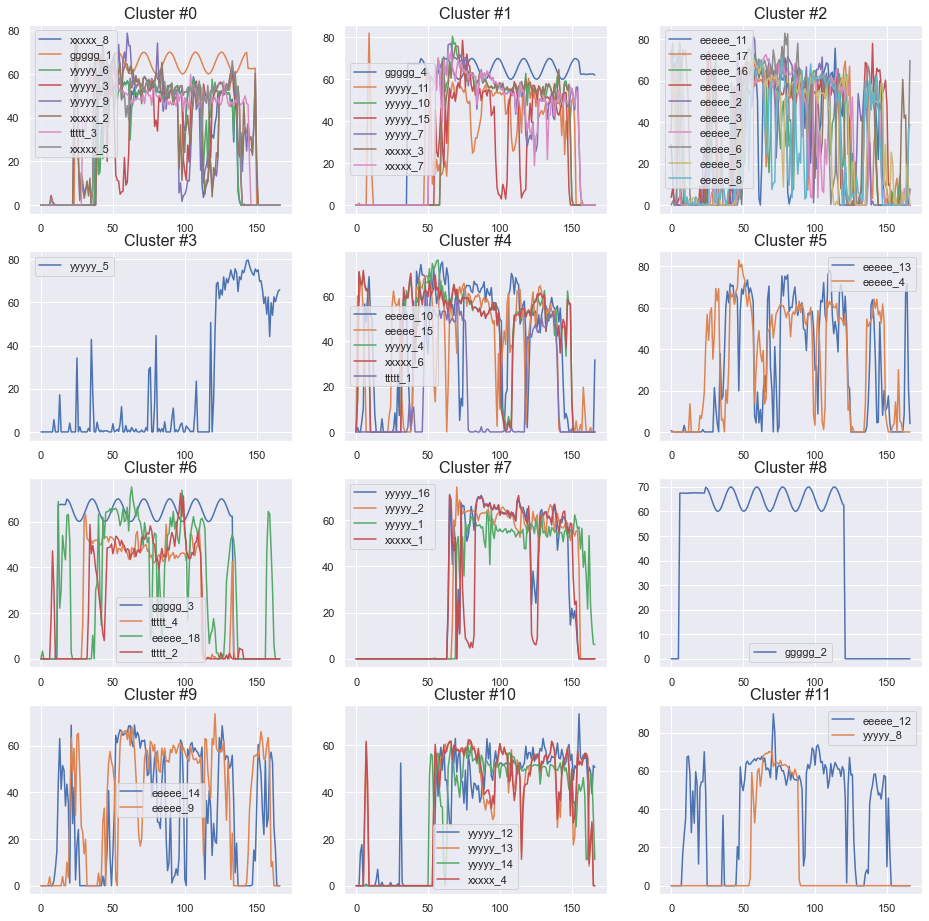

In [122]:
fig, axs = plt.subplots(4,3)

for cluster_id in range(len(cluster_names)):
    i = cluster_id % 3  # Column
    j = cluster_id // 3 # Row
    
    ax = axs[j][i]
    
    names = cluster_names[cluster_id]
    #ax = df[[*names]].plot(figsize=(16,9))
    df[[*names]].plot(ax=ax, figsize=(16,16), legend=True)
    ax.set_title(f"Cluster #{cluster_id}", size=16)

#fig.savefig(IMAGES_DIR + 'cosine_clustering.png')
    